In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('chineseMNIST.csv')

data.drop(columns=['character'], axis=1, inplace=True)

data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 4097 entries, pixel_0 to label
dtypes: int64(4097)
memory usage: 468.9 MB


array([[<AxesSubplot: title={'center': 'label'}>]], dtype=object)

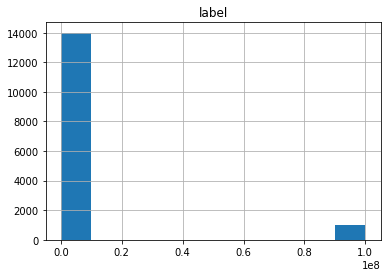

In [4]:
data.hist(column='label', bins=10)

In [5]:
data.label.unique()

array([        9,        10,       100,      1000,     10000, 100000000,
               0,         1,         2,         3,         4,         5,
               6,         7,         8], dtype=int64)

In [14]:
data = data[data.label < 5]

x = data.drop(columns=['label'], axis=1)
y = data.label

In [15]:
from time import time


def timer_func(func):
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.4f}s')
        return result
    return wrap_func

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4000, 4096), (1000, 4096), (4000,), (1000,))

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


@timer_func
def KNN_model():
    number_of_n = np.arange(3, 10, 25)
    model = KNeighborsClassifier()
    params = {'n_neighbors': number_of_n}
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv = 6)
    grid_search.fit(x_train, y_train)
    print(grid_search.best_estimator_)
    predict = grid_search.predict(x_test)
    print(classification_report(predict, y_test))
    return predict

In [18]:
predict = KNN_model()

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       150
           1       0.98      0.37      0.53       484
           2       0.45      0.56      0.50       178
           3       0.40      0.74      0.52       116
           4       0.35      0.89      0.51        72

    accuracy                           0.57      1000
   macro avg       0.58      0.71      0.58      1000
weighted avg       0.73      0.57      0.57      1000

Function 'KNN_model' executed in 2.0471s


In [19]:
sum(np.array(predict == y_test)) / len(y_test)

0.573

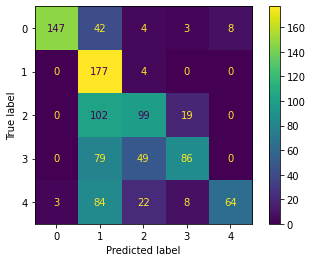

In [20]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


@timer_func
def svm_model():
    param_kernel = ['linear', 'rbf', 'poly', 'sigmoid']
    params = {'kernel': param_kernel}
    model = SVC()
    grid_search_svm = GridSearchCV(estimator=model, param_grid=params, cv = 6)
    grid_search_svm.fit(x_train, y_train)
    best_model = grid_search_svm.best_estimator_
    print(best_model.kernel)
    predict = best_model.predict(x_test)
    print(classification_report(predict, y_test))
    return predict

In [22]:
predict = svm_model()

rbf
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       201
           1       0.94      0.77      0.85       222
           2       0.68      0.77      0.72       194
           3       0.78      0.78      0.78       213
           4       0.91      0.96      0.93       170

    accuracy                           0.84      1000
   macro avg       0.85      0.85      0.84      1000
weighted avg       0.85      0.84      0.84      1000

Function 'svm_model' executed in 467.1101s


In [23]:
sum(np.array(predict == y_test)) / len(y_test)

0.841

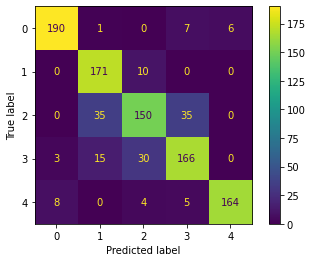

In [24]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()